# Huge Stock Market Dataset

# Importing Libraries

In [28]:
import numpy as np 
import pandas as pd
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [29]:
warnings.filterwarnings('ignore')

# BAJAJFINANCE Stock Market Analyis

In [30]:
df = pd.read_csv("./BAJFINANCE.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [31]:
print(df.head())
print(df.shape)
print(df.columns)

         Date      Symbol Series  Prev Close   Open   High   Low   Last  \
0  2000-01-03  BAJAUTOFIN     EQ       46.95  49.45  50.75  46.5  50.75   
1  2000-01-04  BAJAUTOFIN     EQ       50.75  53.20  53.20  47.9  48.00   
2  2000-01-05  BAJAUTOFIN     EQ       48.10  46.55  47.40  44.6  44.60   
3  2000-01-06  BAJAUTOFIN     EQ       44.60  43.50  46.00  42.1  46.00   
4  2000-01-07  BAJAUTOFIN     EQ       45.25  48.00  48.00  42.0  42.90   

   Close   VWAP  Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  50.75  50.05    7600  3.803800e+10     NaN                 NaN          NaN  
1  48.10  48.56    5000  2.428000e+10     NaN                 NaN          NaN  
2  44.60  45.47    3500  1.591450e+10     NaN                 NaN          NaN  
3  45.25  44.43    6200  2.754750e+10     NaN                 NaN          NaN  
4  42.90  44.44    3500  1.555550e+10     NaN                 NaN          NaN  
(5070, 15)
Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Op

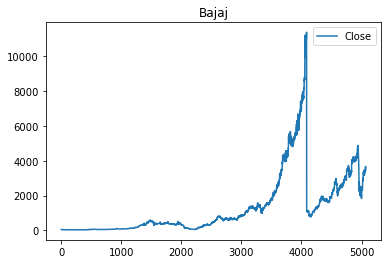

In [32]:
df[['Close']].plot()
plt.title("Bajaj")
plt.show()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 5)'>

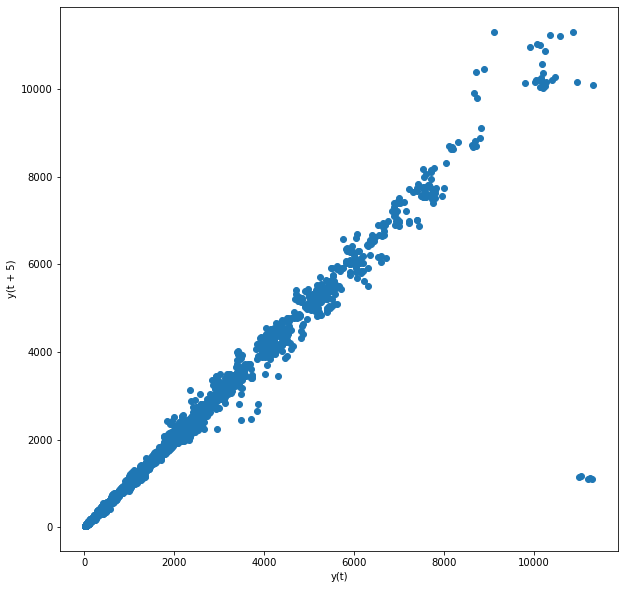

In [33]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)

## ARIMA for Time Series Prediction

In [34]:
df['Date'][1857]

'2007-09-06'

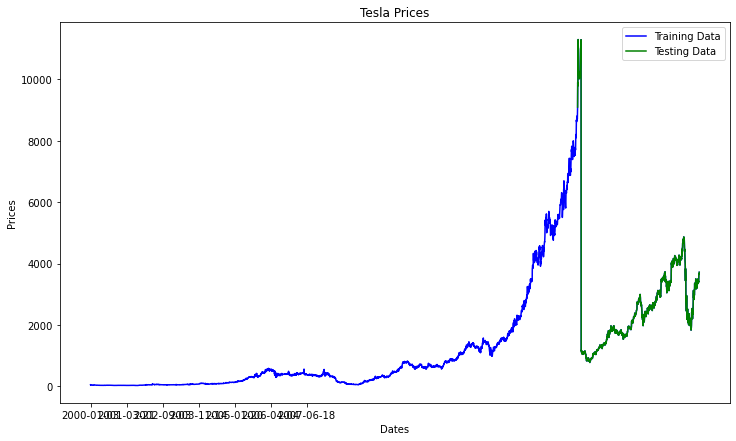

In [35]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [36]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [37]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = sm.tsa.arima.ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Mean Squared Error: %.3f' % error)

<class 'list'>
Mean Squared Error: 116834.444


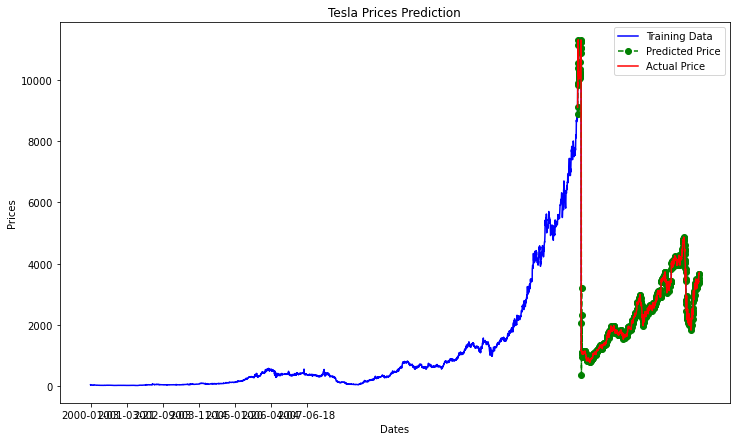

In [38]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [39]:
#test_data['Date'][0:1856:10]

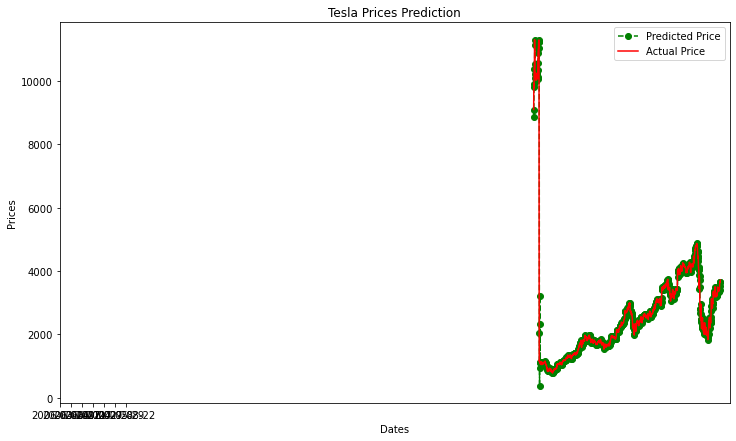

In [40]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()